<a href="https://colab.research.google.com/github/Fahruddin002/PROJECT-MK-KB-KEL-3/blob/main/Fiks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
import cv2
import numpy as np

In [ ]:
def extract_hog(image):
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

  return fd, hog_image

In [ ]:
def plot_images(images, titles):
  fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 6))

  for i in range(len(images)):
    axes[0,i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[0,i].set_title(titles[i])
    axes[0,i].axis("off")

    # Extract HOG features
    hog_features, hog_image = extract_hog(images[i])
    axes[1,i].imshow(hog_image, cmap="gray")
    axes[1,i].set_title("HOG")
    axes[1,i].axis("off")

  plt.tight_layout()
  plt.show()

In [ ]:
# Load images
image1 = cv2.imread("th.jpg")
image2 = cv2.imread("th (1).jpg")
image3 = cv2.imread("th (2).jpg")
image4 = cv2.imread("th (3).jpg")
image5 = cv2.imread("th (4).jpg")
image6 = cv2.imread("th (5).jpg")
image7 = cv2.imread("th (6).jpg")
image8 = cv2.imread("th (7).jpg")
image9 = cv2.imread("th (8).jpg")
image10 = cv2.imread("th (9).jpg")

In [ ]:
# Define titles for images
titles = ["Image 1", "Image 2", "Image 3", "Image 4", "Image 5", "Image 6", "Image 7", "Image 8", "Image 9", "Image 10"]

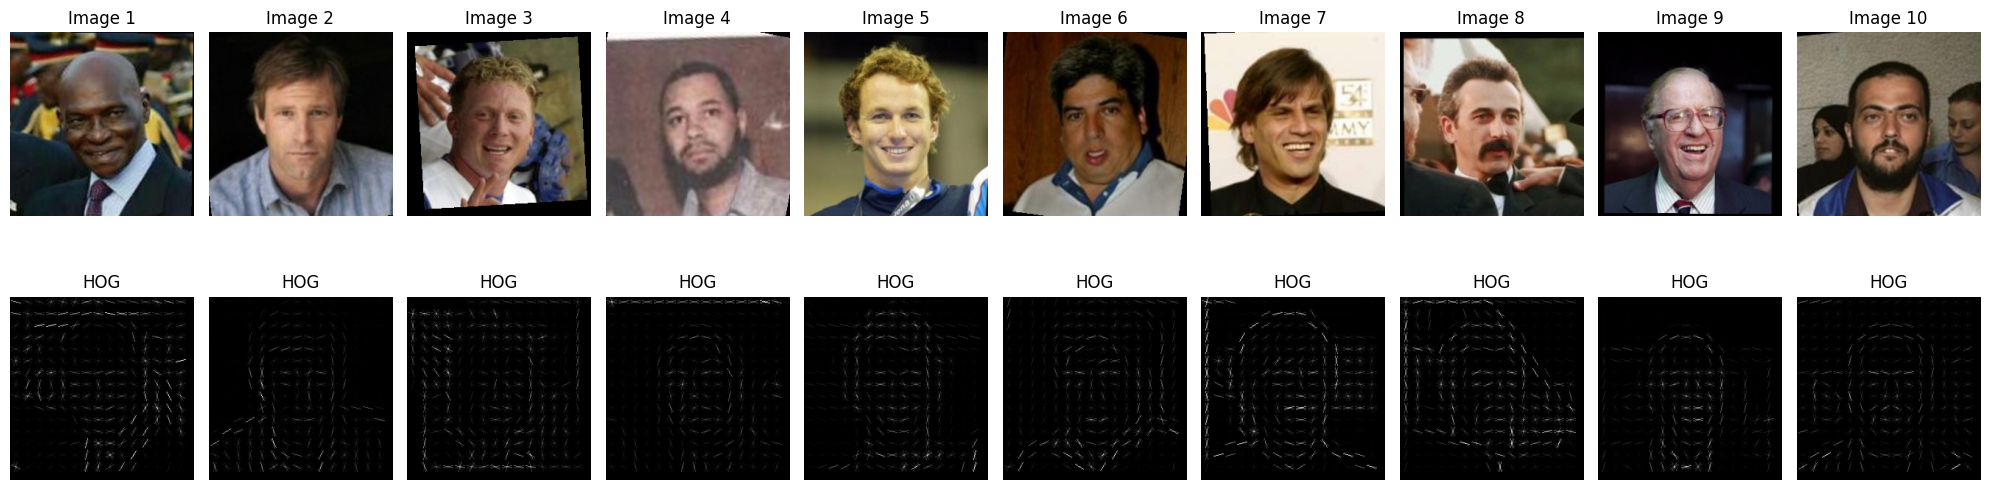

In [ ]:
# Define titles for images# Create a list of images
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]
# Plot the images
plot_images(images, titles)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.feature import hog
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
# Konversi tipe data ke integer
X = X.astype('int')
y = y.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Split dataset ke dalam training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ekstraksi fitur HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd, hog_image = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return hog_features

In [ ]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

In [ ]:
# Contoh: Model menggunakan SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_hog, y_train)
svm_predictions = svm_model.predict(X_test_hog)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9537857142857142
